<img src='img/Logo.png' width=400>
<center>
    <br/>
    Otkrivanje zakonitosti u podacima 2021-2022
    <br/>
    Fakultet Organizacionih Nauka, 2021
    <br/>
</center>


<center>
    <h1>Domaći zadatak 2</h1>
    <h1> Tim 404! </h1>
</center>

   # Zahtevi za drugi domaći zadatak
   

**1.** Učitati podatke o vinima (wine_quality.csv), sa ciljem prepoznavanja "top_quality" klase.
    
    1.2. Kreirati minimalno 3 modela za klasifikaciju (sa default parametrima)
- proceniti grešku generalizacije za sve modele, na osnovu nekoliko metrika;
- prikazati i standardnu devijaciju procene greške (od 10 kros-validacionih uzoraka)
- odgovoriti da li su modeli pretrenirani;
- prodiskutovati koja metrika je najadekvatnija za ovaj problem, i koji tip grešaka je skuplji;
- modifikovati granicu odlučivanja, tako da model pravi više jeftinijih grešaka;
- odgovoriti koji atributi su najbitniji za naučene modele (gde je moguće videti)

**2.** Učitati insurance.csv skup podataka.
    
    2.1. Kreirati tok podataka (eng. pipeline) u kome ćete izvršiti:
    
- Pretvaranje kategoričkih u numeričke atribute
- Popunjavanje nedostajućih vrednosti
- Modelovanje (uz pomoć regresionog stabla odlučivanja)
    
    2.2. Korišćenjem kros validacije oceniti kvalitet regresionog modela (na osnovu RMSE) koji je
kreiran kroz prethodno definisan tok podataka.

    2.3. Korišćenjem rezultata iz 4.1 i 4.2. optimizovati regresiono stabla odlučivanja (minumum 2
parametra i minimum 10 modela treba da bude evaluirano). Da li je optimizacija poboljšala model i
ako jeste koliko?

    2.4. Odaberite najbolji model stabla i predstavite originalni izlaz i predikcije na scatter plotu.
Prokomentarišite rezultate.

# Učitavanje, pregled i priprema skupa podataka

### Skup podataka o kvalitetu vina

In [3]:
wines = pd.read_csv('wine_quality.csv')

In [4]:
f'Skup podataka o kvalitetu vina ima ukupno {len(wines)} slučajeva i {len(wines.columns)} atributa'

'Skup podataka o kvalitetu vina ima ukupno 4898 slučajeva i 12 atributa'

In [5]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,top_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


### Atributes Information
1. **Fixed Acidity** (tartaric acid - g / dm^3) -  Vinska kiselina (ne isparava lako)
2. **Volatile acidity** (acetic acid - g / dm^3) - Sirćetna kiselina u vinu (isparljiva)
3. **Citric acid** (g / dm^3) - Limunska kiselina se nalazi u malim količinama i dodaje „svežinu“ i ukus vinima
4. **Residual sugar** (g / dm^3) - Količina šećera koja ostaje nakon prestanka fermentacije
5. **Chlorides** (sodium chloride - g / dm^3) - Natrijum hlorid; količina soli u vinu
6. **Free sulfur dioxide** (mg / dm^3) - Oslobođen sumpor dioksid; sprečava rast mikroba i oksidaciju vina
7. **Total sulfur dioxide** (mg / dm^3) - Ukupan sumpor dioksid; u niskim koncentracijama ne može se detektovati u vinu
8. **Density** (g / cm^3) - Gustina; masa po jediničnoj zapremini
9. **PH** - PH vrednost; opisuje koliko je supstanca kisela ili bazna na skali od 0 (veoma kisela) do 14 (veoma bazična)
10. **Sulphates** (potassium sulphate - g / dm3) - Kalijum sulfat, aditiv koji deluje kao antimikrobno i antioksidativno
11. **Alcohol** (% by volume) - Procenat alkohola u vinu
12. **Quality** (score 0 and 1) - Kvalitet vina ocenjen kao 0 i 1

<img src='img/wine.jpg' width=500>

In [6]:
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
top_quality               int64
dtype: object

Tipovi podataka za sve atribute osim poslednjeg su float, što je ujedno i odgovarajući tip. Poslednji atribut govori o tome da li je vino ocenjeno sa ocenom 0, što bi značilo da je loše, ili ocenom 1, što bi znčilo da je dobro. U narednim koracima vrednosti će ostati na 0 i 1 izvršena promena, ali će se atribut *top_quality* tumačiti sa dve vrednosti: **Bad** što znači da je vino loše i **Good** što ukazuje na dobar kvalitet vina.

In [7]:
wines['top_quality'].unique()

array([0, 1], dtype=int64)

0    0.783585
1    0.216415
Name: top_quality, dtype: float64
0    3838
1    1060
Name: top_quality, dtype: int64


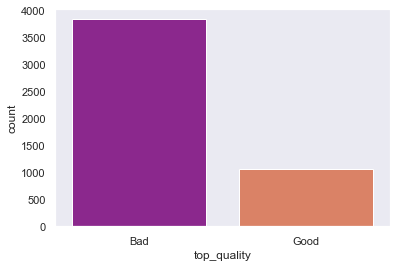

In [8]:
sns.countplot(wines['top_quality'].map({0: 'Bad', 1:'Good'}), palette='plasma')
print(wines['top_quality'].value_counts(normalize=True))
print(wines['top_quality'].value_counts())
plt.grid(False)
plt.show()

Sa prethodne vizuelizacije, jasno je uočljivo da klase *Bad* ima dosta više nego klase *Good*, odnosno jasno je da je reč o nebalansiranom skupu podataka, koji je potrebno na neki način i regulisati. U cilju je predviteti što više onih vina koji su dobrog kvaliteta, tako da je pozitivna klasa Good, odnosno negativna klasa je Bad.

In [9]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  top_quality           4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


- Ovaj skup podataka nema nedostajućih vrednosti.
- Svi tipovi podataka su validno definisani.

Kako je definisani problem, zapravo problem **klasifikacije**, odnosno predviđanja kategoričkog izlaza, tj. u ovom slučaju kvaliteta vina, onda je potrebno odvojili ulazne podatke **X** od izlaznog atributa **y**.

<img src='img/slika.png' width=800>

In [10]:
X = wines.iloc[:, :-1]
y= wines.iloc[:, -1]

##### Prikaz histograma za svaku od ulaznih promenljiva

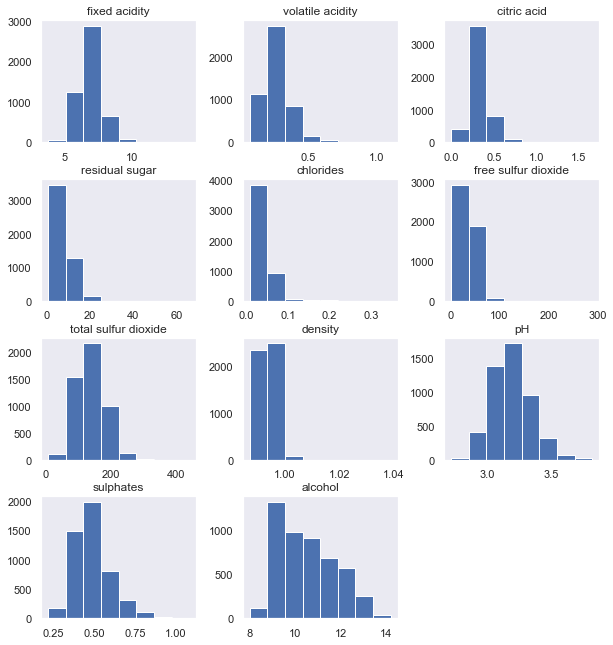

In [11]:
sns.set(font_scale=1.0)
X.hist(bins=8, figsize=(10, 11), grid=False)
plt.show()

In [12]:
X.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Pokazano je i ranije da skup podataka nema NA (eng. *not aviable*) vrednosti.

### Provera multikolinearnosti između ulaznih promenljivih

In [13]:
corr=X.corr()
corr.style.background_gradient(cmap='cool').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.00,-0.02,0.29,0.09,0.02,-0.05,0.09,0.27,-0.43,-0.02,-0.12
volatile acidity,-0.02,1.00,-0.15,0.06,0.07,-0.10,0.09,0.03,-0.03,-0.04,0.07
citric acid,0.29,-0.15,1.00,0.09,0.11,0.09,0.12,0.15,-0.16,0.06,-0.08
residual sugar,0.09,0.06,0.09,1.00,0.09,0.30,0.40,0.84,-0.19,-0.03,-0.45
chlorides,0.02,0.07,0.11,0.09,1.00,0.10,0.20,0.26,-0.09,0.02,-0.36
free sulfur dioxide,-0.05,-0.10,0.09,0.30,0.10,1.00,0.62,0.29,-0.00,0.06,-0.25
total sulfur dioxide,0.09,0.09,0.12,0.40,0.20,0.62,1.00,0.53,0.00,0.13,-0.45
density,0.27,0.03,0.15,0.84,0.26,0.29,0.53,1.00,-0.09,0.07,-0.78
pH,-0.43,-0.03,-0.16,-0.19,-0.09,-0.00,0.00,-0.09,1.00,0.16,0.12
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.13,0.07,0.16,1.00,-0.02


Na osnovu korelacione matrice može se zaključiti da neke od promenljivih stvaraju visoku zavisnost između sebe. Pa tako, gustina vina zavisi od procenta alkohola i od količine šećera koje sadrži, odnosno, alkohol razređuje vino, a šečer ga čini gušćim. Tako da je iz dalje analize potrebno izbaciti atribut gustina, kako bi se sprečila multikolinearnost i pogrešno modelovanje algoritma.

Funkcija na osnovu koje se pronalaze visoko-korelisani atributi, a potom i izbacuju:

In [14]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] 

In [15]:
correlation(X, 0.7)
corr=X.corr()
corr.style.background_gradient(cmap='cool').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
fixed acidity,1.00,-0.02,0.29,0.09,0.02,-0.05,0.09,-0.43,-0.02,-0.12
volatile acidity,-0.02,1.00,-0.15,0.06,0.07,-0.10,0.09,-0.03,-0.04,0.07
citric acid,0.29,-0.15,1.00,0.09,0.11,0.09,0.12,-0.16,0.06,-0.08
residual sugar,0.09,0.06,0.09,1.00,0.09,0.30,0.40,-0.19,-0.03,-0.45
chlorides,0.02,0.07,0.11,0.09,1.00,0.10,0.20,-0.09,0.02,-0.36
free sulfur dioxide,-0.05,-0.10,0.09,0.30,0.10,1.00,0.62,-0.00,0.06,-0.25
total sulfur dioxide,0.09,0.09,0.12,0.40,0.20,0.62,1.00,0.00,0.13,-0.45
pH,-0.43,-0.03,-0.16,-0.19,-0.09,-0.00,0.00,1.00,0.16,0.12
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.13,0.16,1.00,-0.02
alcohol,-0.12,0.07,-0.08,-0.45,-0.36,-0.25,-0.45,0.12,-0.02,1.00


### Podela skupa podataka na skup za učenje i skup za testiranje

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 2021)

In [17]:
f'Broj podataka u skupu podataka za trening: {len(X_train)}, a broj podataka u skupu podataka za testiranje: {len(X_test)}'

'Broj podataka u skupu podataka za trening: 3428, a broj podataka u skupu podataka za testiranje: 1470'

In [18]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
3110,6.7,0.240,0.46,2.2,0.033,19.0,111.0,3.10,0.62,11.9
3265,4.2,0.215,0.23,5.1,0.041,64.0,157.0,3.42,0.44,8.0
3687,6.0,0.160,0.27,12.0,0.030,39.0,98.0,3.15,0.34,10.8
4834,5.9,0.370,0.30,1.5,0.033,35.0,95.0,3.36,0.56,12.0
1622,6.5,0.440,0.49,7.7,0.045,16.0,169.0,3.11,0.37,8.7


#### Regulisanje izuzetaka (eng. *outliers*)

In [19]:
z = np.abs(stats.zscore(X_train))
print(len(np.where(z>3)[0]))
X_index=(z<3).all(axis=1)
print(sum(X_index==False))

326
287


In [20]:
X_train = X_train[X_index]
y_train = y_train[X_index]
f'Broj podataka u skupu podataka za trening sada iznosi: {len(X_train)}'

'Broj podataka u skupu podataka za trening sada iznosi: 3141'

Kako je i ranije zaključeno, ovaj skup podataka ima nebalansiranu izlaznu promenljivu. Potrebno je primeniti neku od strategija stratifikovanog uzorkovanja isključivo na setu za učenje kako bi se regulisao ovaj problem. U ovom projektnom zadatku će biti korišćena *Under-sampling with clusters* i *Smote over-sampling*, a potom će biti uvedena i granica odlučivanja.

# Threshold

<img src='img/matrica.png' width=300>

Greške koje model pravi prilikom predviđanja se javljaju na sporednoj dijagonali, a to su : *False Negative i False Positive* klase.

 - **False Positive** - Kvalitet vina je loš, a model predviđa da je vino dobrog kavliteta i da je spremno za prodaju. U tom slučaju, prodaje se loše vino kupcima, pa samim tim nezadovoljstvo kupaca ovim konkretnim proizvodom, ali i drugim proizvodima kompanije će rasti. Na taj način se gube lojalni kupci, kao i potencijalni kupci, jer loš glas o proizvodima se mnogo brže širi nego pozitivan.
 
 
 - **False Negative** -> Kvalitet vina je dobar, a model predviđa da je vino lošeg kvaliteta i da kao takvo nije spremno za prodaju. U tom slučaju vršiće se dodatna testiranja, analize i slično da se poboljša kvalitet vina, što zapravo nije ni bilo potrebno, ali sa druge strane na taj način može da s dospe i do višeg ranga kvaliteta vina. Takođe, ova vina neće biti prodata kupcima, ali to ne znači da neće u nekom budućem periodu.

<img src='img/vaga_.png' width=400>

0    2426
1     715
Name: top_quality, dtype: int64


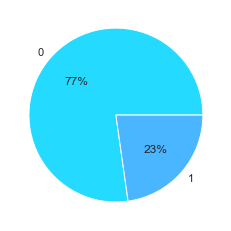

In [21]:
print(y_train.value_counts())
sns.set_palette('cool')
plt.pie(y_train.value_counts(),
        labels=y_train.value_counts().index,
        autopct='%.0f%%')
plt.show()

### Logistic Regression with threshold

In [22]:
X_train_before_sample = X_train
y_train_before_sample = y_train

In [23]:
algorithm = LogisticRegression()
model = algorithm.fit(X_train, y_train)

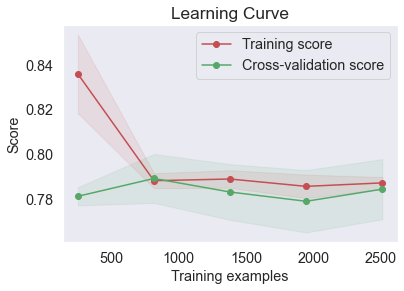

In [24]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)
plt.show()

Koristimo verovatnoće pozitivnog ishoda.

In [25]:
y_probs = model.predict_proba(X_test)

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])

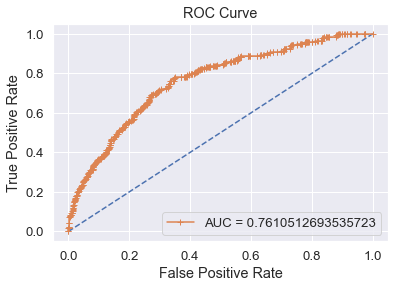

In [27]:
plt.figure()
plt.plot([0,1], [0,1], linestyle="--")
plt.plot(fpr, tpr, marker="+", label=f"AUC = {roc_auc_score(y_test, y_probs[:,1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

In [28]:
roc_auc=roc_auc_score(y_test, y_probs[:,1])
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.761051


Optimalna granica odlučivanja u ovom slučaju je 0.228, međutim kako je nama cilj da napravimo više manje skupih grešaka, ova granica odlučivanja će verovatno biti izmenjena.

In [29]:
threshold =thresholds[np.argmin(abs(tpr-(1-fpr)))]
threshold

0.22843440223888054

In [30]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs[:,1])

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure()
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

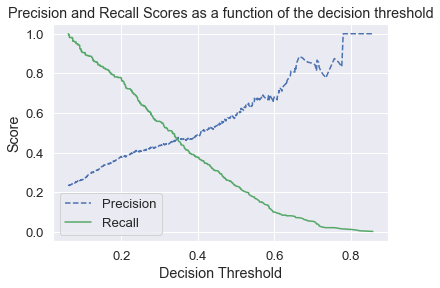

In [32]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [34]:
def compute_eval_metrics(y_test, y_hat):
    '''
    This function compute evaluation metrics where positive label is 'Good'.
    '''
    print('Accuracy: {} %\n'.format(round(accuracy_score(y_test, y_hat)*100,3)))
    print('Precision: {} %\n'.format(round(precision_score(y_test, y_hat)*100,3)))
    print('Recall: {} %\n'.format(round(recall_score(y_test, y_hat)*100,3)))
    print('F1 measure: {} %\n\n'.format(round(f1_score(y_test, y_hat)*100,3)))

In [54]:
thresholds = [0.228, 0.3, 0.37, 0.42, 0.45, 0.5, 0.6]
for thr in thresholds:
    print('Threshold= {}\n'.format(thr))
    compute_eval_metrics(y_test, y_probs[:,1] >= thr)

Threshold= 0.228

Accuracy: 70.544 %

Precision: 39.716 %

Recall: 70.662 %

F1 measure: 50.851 %


Threshold= 0.3

Accuracy: 74.898 %

Precision: 43.564 %

Recall: 55.521 %

F1 measure: 48.821 %


Threshold= 0.37

Accuracy: 77.143 %

Precision: 46.619 %

Recall: 41.325 %

F1 measure: 43.813 %


Threshold= 0.42

Accuracy: 78.776 %

Precision: 51.163 %

Recall: 34.7 %

F1 measure: 41.353 %


Threshold= 0.45

Accuracy: 79.388 %

Precision: 53.846 %

Recall: 30.915 %

F1 measure: 39.279 %


Threshold= 0.5

Accuracy: 79.932 %

Precision: 58.871 %

Recall: 23.028 %

F1 measure: 33.107 %


Threshold= 0.6

Accuracy: 79.524 %

Precision: 67.391 %

Recall: 9.779 %

F1 measure: 17.08 %




Probali smo više vrednosti za granicu odlučivanja. Najbolji rezultat upravo daje vrednost koju smo preko formule i izračunali kao optimalan treshold, međutim nama je cilj da pravimo više onih grešaka koje su manje skupe, tj. cilj je da se poveća preciznost modela. Tako da biramo onu vrednost koja nam zadržava dovoljno dobru vrednost za sve metrike, ali tako da preciznost bude viša od odziva sistema. Dakle, biramo vrednost 0.42.

### Pravljenje modela sa uključenom granicom odlučivanja Logistička regresija

In [55]:
threshold=0.42
algorithm = LogisticRegression()
y_hat = y_probs[:,1] >= threshold

<AxesSubplot:>

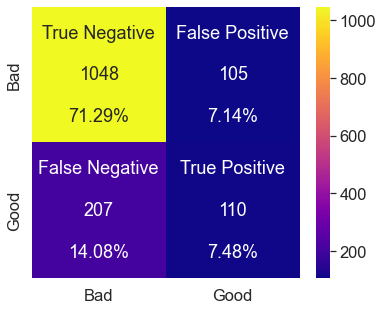

In [56]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

In [52]:
print('Before threshold\n')
compute_eval_metrics(y_test, model.predict(X_test))

Before threshold

Accuracy: 79.932 %

Precision: 58.871 %

Recall: 23.028 %

F1 measure: 33.107 %




In [57]:
print('After threshold\n')
compute_eval_metrics(y_test, y_hat)

After threshold

Accuracy: 78.776 %

Precision: 51.163 %

Recall: 34.7 %

F1 measure: 41.353 %




<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

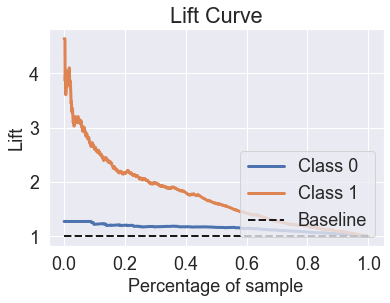

In [58]:
skplt.metrics.plot_lift_curve(y_test, y_probs)

In [59]:
predictions = pd.DataFrame({'p' : y_probs[:,1], 
                            'lift' : y_probs[:,1]/y_test.mean(),
                           'group' : pd.qcut(y_probs[:, 1]/y_test.mean(), q=20, labels=False) + 1})
predictions.sort_values(by = ['lift'], ascending = False).head(10)

,p,lift,group
365,0.857511,3.976473,20
384,0.823155,3.817152,20
805,0.816457,3.786092,20
209,0.803610,3.726520,20
847,0.780110,3.617545,20
1302,0.776405,3.600363,20
1284,0.767754,3.560249,20
289,0.757041,3.510570,20
425,0.734664,3.406803,20
1140,0.725409,3.363885,20


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

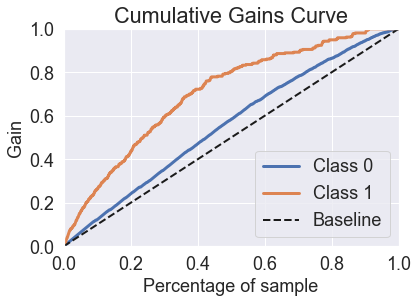

In [60]:
skplt.metrics.plot_cumulative_gain(y_test, y_probs)

### Random Forest with threshold

In [61]:
y_train=y_train_before_sample
X_train=X_train_before_sample

In [87]:
algorithm = RandomForestClassifier(max_depth= 5, min_samples_split= 21)
model = algorithm.fit(X_train, y_train)

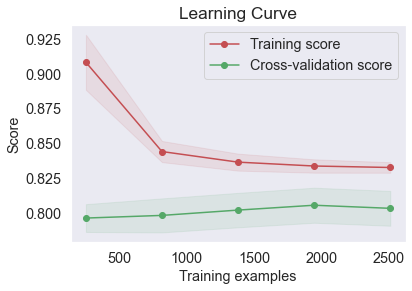

In [88]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)
plt.show()

Koristimo verovatnoće pozitivnog ishoda.

In [89]:
y_probs = model.predict_proba(X_test)

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])

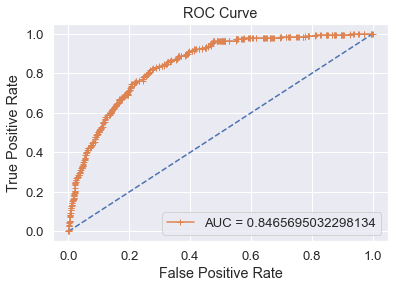

In [91]:
plt.figure()
plt.plot([0,1], [0,1], linestyle="--")
plt.plot(fpr, tpr, marker="+", label=f"AUC = {roc_auc_score(y_test, y_probs[:,1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

In [92]:
roc_auc=roc_auc_score(y_test, y_probs[:,1])
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.846570


Optimalna granica odlučivanja u ovom slučaju je 0.27, međutim kako je nama cilj da napravimo više manje skupih grešaka, ova granica odlučivanja će verovatno biti izmenjena.

In [94]:
threshold =thresholds[np.argmin(abs(tpr-(1-fpr)))]
threshold

0.2712303442875509

In [95]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs[:,1])

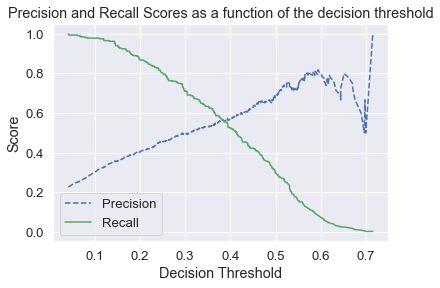

In [96]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [97]:
thresholds = [0.27, 0.38, 0.39, 0.40, 0.41, 0.42, 0.6]
for thr in thresholds:
    print('Threshold= {}\n'.format(thr))
    compute_eval_metrics(y_test, y_probs[:,1] >= thr)

Threshold= 0.27

Accuracy: 76.463 %

Precision: 47.173 %

Recall: 76.341 %

F1 measure: 58.313 %


Threshold= 0.38

Accuracy: 81.156 %

Precision: 56.25 %

Recall: 56.782 %

F1 measure: 56.515 %


Threshold= 0.39

Accuracy: 81.429 %

Precision: 57.143 %

Recall: 55.521 %

F1 measure: 56.32 %


Threshold= 0.4

Accuracy: 81.293 %

Precision: 57.241 %

Recall: 52.366 %

F1 measure: 54.695 %


Threshold= 0.41

Accuracy: 81.565 %

Precision: 58.273 %

Recall: 51.104 %

F1 measure: 54.454 %


Threshold= 0.42

Accuracy: 81.633 %

Precision: 59.144 %

Recall: 47.95 %

F1 measure: 52.962 %


Threshold= 0.6

Accuracy: 79.592 %

Precision: 79.31 %

Recall: 7.256 %

F1 measure: 13.295 %




Probali smo više vrednosti za granicu odlučivanja. Najbolji rezultat upravo daje vrednost koju smo preko formule i izračunali kao optimalan treshold, međutim nama je cilj da pravimo više onih grešaka koje su manje skupe, tj. cilj je da se poveća preciznost modela. Tako da biramo onu vrednost koja nam zadržava dovoljno dobru vrednost za sve metrike, ali tako da preciznost bude viša od odziva sistema. Dakle, biramo vrednost 0.39.

### Pravljenje modela sa uključenom granicom odlučivanja Random Forest

In [98]:
threshold=0.39
y_hat = y_probs[:,1] >= threshold

<AxesSubplot:>

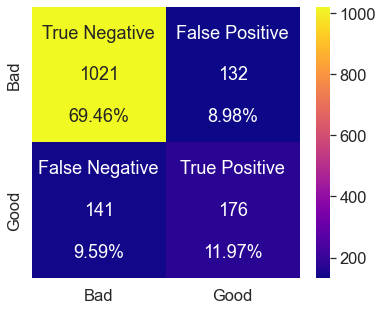

In [99]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

In [100]:
print('Before threshold\n')
compute_eval_metrics(y_test, model.predict(X_test))

Before threshold

Accuracy: 81.973 %

Precision: 69.118 %

Recall: 29.653 %

F1 measure: 41.501 %




In [101]:
print('After threshold\n')
compute_eval_metrics(y_test, y_hat)

After threshold

Accuracy: 81.429 %

Precision: 57.143 %

Recall: 55.521 %

F1 measure: 56.32 %




<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

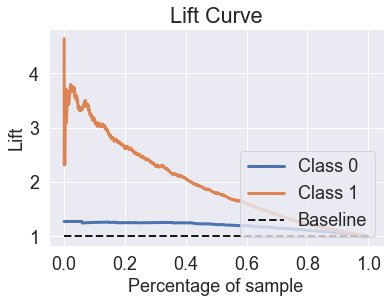

In [102]:
skplt.metrics.plot_lift_curve(y_test, y_probs)

In [103]:
predictions = pd.DataFrame({'p' : y_probs[:,1], 
                            'lift' : y_probs[:,1]/y_test.mean(),
                           'group' : pd.qcut(y_probs[:, 1]/y_test.mean(), q=20, labels=False, duplicates='drop') + 1})
predictions.sort_values(by = ['lift'], ascending = False).head(10)

,p,lift,group
1458,0.715094,3.316049,20
194,0.699634,3.244357,20
490,0.697840,3.236039,20
1243,0.696394,3.229334,20
148,0.689413,3.196962,20
166,0.675870,3.134161,20
365,0.671316,3.113041,20
805,0.670134,3.107560,20
791,0.662005,3.069863,20
676,0.651820,3.022634,20


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

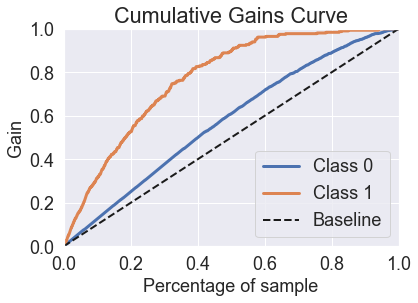

In [104]:
skplt.metrics.plot_cumulative_gain(y_test, y_probs)

### Gradient Boosting Tree with threshold

In [105]:
y_train=y_train_before_sample
X_train=X_train_before_sample

In [106]:
algorithm = GradientBoostingClassifier()
model = algorithm.fit(X_train, y_train)

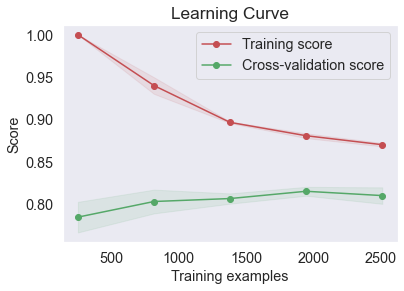

In [107]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)
plt.show()

Koristimo verovatnoće pozitivnog ishoda.

In [108]:
y_probs = model.predict_proba(X_test)

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])

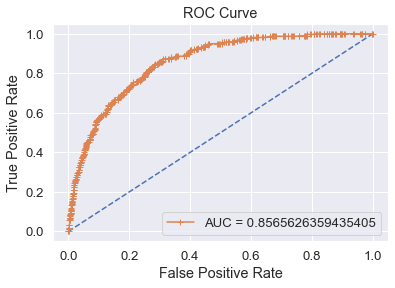

In [110]:
plt.figure()
plt.plot([0,1], [0,1], linestyle="--")
plt.plot(fpr, tpr, marker="+", label=f"AUC = {roc_auc_score(y_test, y_probs[:,1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

In [111]:
roc_auc=roc_auc_score(y_test, y_probs[:,1])
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.856563


Optimalna granica odlučivanja u ovom slučaju je 0.28, međutim kako je nama cilj da napravimo više manje skupih grešaka, ova granica odlučivanja će verovatno biti izmenjena.

In [112]:
threshold =thresholds[np.argmin(abs(tpr-(1-fpr)))]
threshold

0.25497758550694843

In [113]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs[:,1])

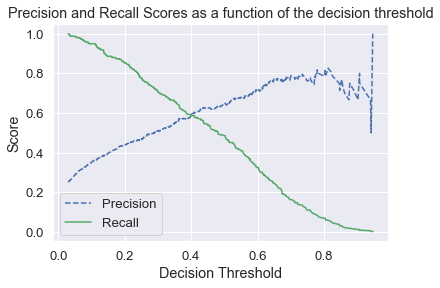

In [114]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [115]:
thresholds = [0.255, 0.38, 0.39, 0.40, 0.41, 0.42, 0.5, 0.6]
for thr in thresholds:
    print('Threshold= {}\n'.format(thr))
    compute_eval_metrics(y_test, y_probs[:,1] >= thr)

Threshold= 0.255

Accuracy: 76.531 %

Precision: 47.266 %

Recall: 76.341 %

F1 measure: 58.384 %


Threshold= 0.38

Accuracy: 81.701 %

Precision: 57.101 %

Recall: 60.883 %

F1 measure: 58.931 %


Threshold= 0.39

Accuracy: 81.701 %

Precision: 57.317 %

Recall: 59.306 %

F1 measure: 58.295 %


Threshold= 0.4

Accuracy: 82.245 %

Precision: 58.861 %

Recall: 58.675 %

F1 measure: 58.768 %


Threshold= 0.41

Accuracy: 82.585 %

Precision: 60.0 %

Recall: 57.729 %

F1 measure: 58.842 %


Threshold= 0.42

Accuracy: 82.857 %

Precision: 60.87 %

Recall: 57.413 %

F1 measure: 59.091 %


Threshold= 0.5

Accuracy: 83.197 %

Precision: 64.706 %

Recall: 48.58 %

F1 measure: 55.495 %


Threshold= 0.6

Accuracy: 82.721 %

Precision: 72.028 %

Recall: 32.492 %

F1 measure: 44.783 %




Probali smo više vrednosti za granicu odlučivanja. Najbolji rezultat upravo daje vrednost koju smo preko formule i izračunali kao optimalan treshold, međutim nama je cilj da pravimo više onih grešaka koje su manje skupe, tj. cilj je da se poveća preciznost modela. Tako da biramo onu vrednost koja nam zadržava dovoljno dobru vrednost za sve metrike, ali tako da preciznost bude viša od odziva sistema. Dakle, biramo vrednost 0.42.

### Pravljenje modela sa uključenom granicom odlučivanja Gradient Boosting

In [116]:
threshold=0.42
y_hat = y_probs[:,1] >= threshold

<AxesSubplot:>

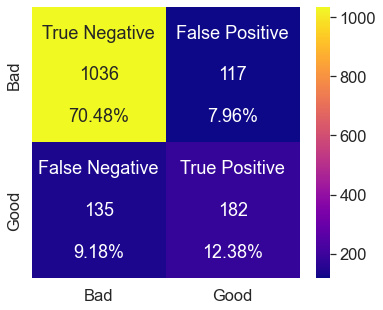

In [117]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

In [118]:
print('Before threshold\n')
compute_eval_metrics(y_test, model.predict(X_test))

Before threshold

Accuracy: 83.197 %

Precision: 64.706 %

Recall: 48.58 %

F1 measure: 55.495 %




In [119]:
print('After threshold\n')
compute_eval_metrics(y_test, y_hat)

After threshold

Accuracy: 82.857 %

Precision: 60.87 %

Recall: 57.413 %

F1 measure: 59.091 %




<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

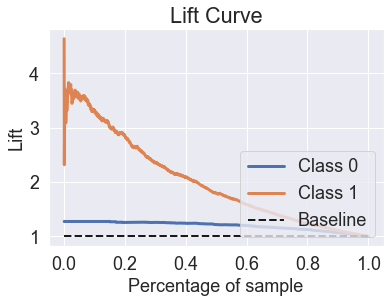

In [120]:
skplt.metrics.plot_lift_curve(y_test, y_probs)

In [121]:
predictions = pd.DataFrame({'p' : y_probs[:,1], 
                            'lift' : y_probs[:,1]/y_test.mean(),
                           'group' : pd.qcut(y_probs[:, 1]/y_test.mean(), q=20, labels=False, duplicates='drop') + 1})
predictions.sort_values(by = ['lift'], ascending = False).head(10)

,p,lift,group
148,0.947021,4.391549,20
1243,0.942022,4.368367,20
1458,0.940100,4.359453,20
490,0.907487,4.208220,20
805,0.907191,4.206846,20
194,0.902422,4.184732,20
791,0.889888,4.126608,20
166,0.877509,4.069204,20
1085,0.875017,4.057652,20
365,0.862609,4.000110,20


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

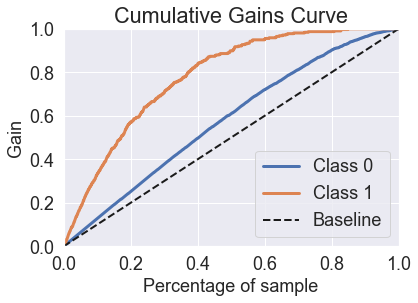

In [122]:
skplt.metrics.plot_cumulative_gain(y_test, y_probs)

### Naive Bayes Tree with threshold

In [123]:
y_train=y_train_before_sample
X_train=X_train_before_sample

In [124]:
algorithm = GaussianNB()
model = algorithm.fit(X_train, y_train)

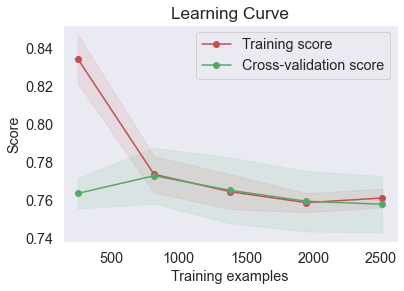

In [125]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)
plt.show()

Koristimo verovatnoće pozitivnog ishoda.

In [126]:
y_probs = model.predict_proba(X_test)

In [127]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])

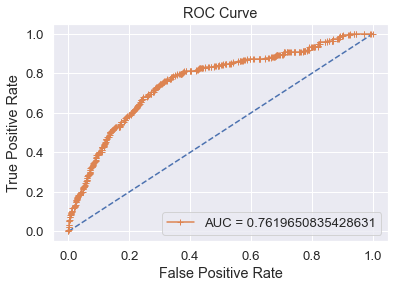

In [128]:
plt.figure()
plt.plot([0,1], [0,1], linestyle="--")
plt.plot(fpr, tpr, marker="+", label=f"AUC = {roc_auc_score(y_test, y_probs[:,1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

In [129]:
roc_auc=roc_auc_score(y_test, y_probs[:,1])
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.761965


Optimalna granica odlučivanja u ovom slučaju je 0.28, međutim kako je nama cilj da napravimo više manje skupih grešaka, ova granica odlučivanja će verovatno biti izmenjena.

In [130]:
threshold =thresholds[np.argmin(abs(tpr-(1-fpr)))]
threshold

0.324355701443659

In [131]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs[:,1])

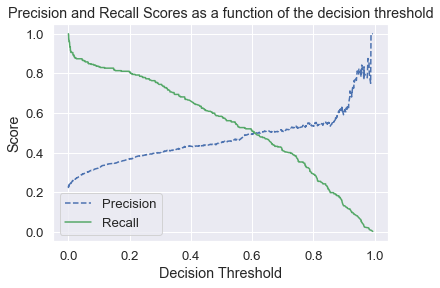

In [132]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [133]:
thresholds = [0.32, 0.61, 0.62, 0.63, 0.64]
for thr in thresholds:
    print('Threshold= {}\n'.format(thr))
    compute_eval_metrics(y_test, y_probs[:,1] >= thr)

Threshold= 0.32

Accuracy: 71.497 %

Precision: 40.925 %

Recall: 72.555 %

F1 measure: 52.332 %


Threshold= 0.61

Accuracy: 78.571 %

Precision: 50.318 %

Recall: 49.842 %

F1 measure: 50.079 %


Threshold= 0.62

Accuracy: 78.435 %

Precision: 50.0 %

Recall: 48.896 %

F1 measure: 49.442 %


Threshold= 0.63

Accuracy: 78.503 %

Precision: 50.165 %

Recall: 47.95 %

F1 measure: 49.032 %


Threshold= 0.64

Accuracy: 78.776 %

Precision: 50.842 %

Recall: 47.634 %

F1 measure: 49.186 %




Probali smo više vrednosti za granicu odlučivanja. Najbolji rezultat upravo daje vrednost koju smo preko formule i izračunali kao optimalan treshold, međutim nama je cilj da pravimo više onih grešaka koje su manje skupe, tj. cilj je da se poveća preciznost modela. Tako da biramo onu vrednost koja nam zadržava dovoljno dobru vrednost za sve metrike, ali tako da preciznost bude viša od odziva sistema. Dakle, biramo vrednost 0.61.

### Pravljenje modela sa uključenom granicom odlučivanja Naive Bayes

In [151]:
threshold=0.61
y_hat = y_probs[:,1] >= threshold

<AxesSubplot:>

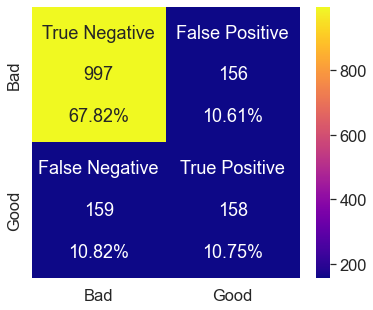

In [152]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

In [136]:
print('Before threshold\n')
compute_eval_metrics(y_test, model.predict(X_test))

Before threshold

Accuracy: 75.85 %

Precision: 45.343 %

Recall: 58.36 %

F1 measure: 51.034 %




In [153]:
print('After threshold\n')
compute_eval_metrics(y_test, y_hat)

After threshold

Accuracy: 78.571 %

Precision: 50.318 %

Recall: 49.842 %

F1 measure: 50.079 %




<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

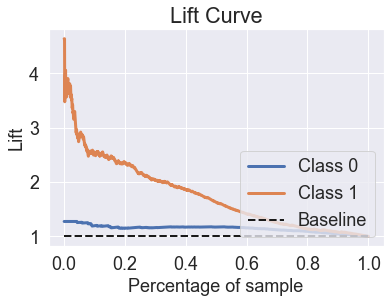

In [154]:
skplt.metrics.plot_lift_curve(y_test, y_probs)

In [155]:
predictions = pd.DataFrame({'p' : y_probs[:,1], 
                            'lift' : y_probs[:,1]/y_test.mean(),
                           'group' : pd.qcut(y_probs[:, 1]/y_test.mean(), q=20, labels=False, duplicates='drop') + 1})
predictions.sort_values(by = ['lift'], ascending = False).head(10)

,p,lift,group
365,0.993702,4.608020,20
943,0.991111,4.596003,20
805,0.987933,4.581268,20
310,0.986712,4.575604,20
289,0.982297,4.555133,20
1284,0.981640,4.552085,20
192,0.981468,4.551287,20
384,0.977954,4.534991,20
368,0.975632,4.524226,20
831,0.966051,4.479796,20


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

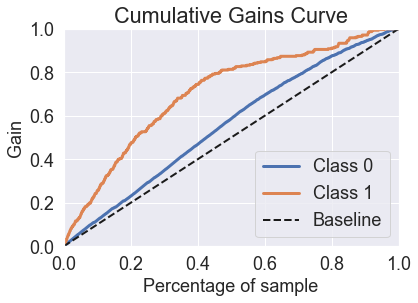

In [156]:
skplt.metrics.plot_cumulative_gain(y_test, y_probs)

### Poređenje više modela

In [157]:
def stats(cv_dict):
    stats = {}
    for k,v in cv_dict.items(): 
        stats.update({k:(round(v.mean(),3), round(v.std(),3))})
    return(stats)

In [158]:
models = {'Naive Bayes':GaussianNB(), 
          'Random Forest': RandomForestClassifier(max_depth=5, min_samples_split=21), 
          'Gradient Boosting Tree' : GradientBoostingClassifier(),
          'Logistic Regression': LogisticRegression()}

y_train=y_train_before_sample
X_train=X_train_before_sample
stats_result = []

for name, model in models.items():
    
       
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)  
    
    cross_val = cross_validate(model, X_train, y_train, cv=10, 
                              scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
    stats_result.append(stats(cross_val))

##### Srednja vrednost i standardna devijacija mera evaulacije po modelima.

In [159]:
pd.DataFrame(stats_result, index= models.keys()).T

,Naive Bayes,Random Forest,Gradient Boosting Tree,Logistic Regression
fit_time,"(0.006, 0.004)","(0.6, 0.003)","(0.965, 0.054)","(0.157, 0.013)"
score_time,"(0.012, 0.005)","(0.07, 0.003)","(0.019, 0.002)","(0.013, 0.005)"
test_accuracy,"(0.758, 0.028)","(0.807, 0.017)","(0.814, 0.015)","(0.784, 0.016)"
test_precision,"(0.476, 0.05)","(0.697, 0.104)","(0.644, 0.059)","(0.562, 0.082)"
test_recall,"(0.589, 0.064)","(0.277, 0.04)","(0.417, 0.069)","(0.232, 0.05)"
test_f1,"(0.526, 0.054)","(0.395, 0.054)","(0.502, 0.056)","(0.327, 0.06)"
test_roc_auc,"(0.771, 0.038)","(0.839, 0.034)","(0.85, 0.024)","(0.753, 0.042)"


## Under - sampling with clusters and results

In [160]:
y_train = y_train_before_sample 
X_train = X_train_before_sample 

0    2426
1     715
Name: top_quality, dtype: int64


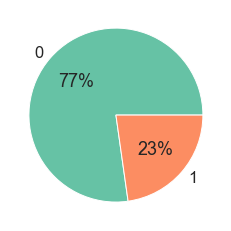

In [161]:
print(y_train.value_counts())
sns.set_palette('Set2')
plt.pie(y_train.value_counts(),
        labels=y_train.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [162]:
cc = ClusterCentroids(random_state= 2021)
X_train, y_train = cc.fit_resample(X_train, y_train)

In [163]:
print('Broj elementa svake klase pre uzorkovanja:\n')
print(y_train_before_sample.value_counts())
print('\nBroj elementa svake klase nakon uzorkovanja:\n')
print(pd.Series(y_train).value_counts())

Broj elementa svake klase pre uzorkovanja:

0    2426
1     715
Name: top_quality, dtype: int64

Broj elementa svake klase nakon uzorkovanja:

0    715
1    715
Name: top_quality, dtype: int64


Može se videti da je sada isti broj slučajeva i u skupu podataka za učenje i u skupu podataka za testiranje. Tehnikom stratifikovanog uzorkovanja, smanjen je broj slučajeva većinske klase na onoliko koliko slučajeva ima manjinska klasa.

In [164]:
algorithm = GradientBoostingClassifier()
model = algorithm.fit(X_train, y_train)
stats_result = []
y_hat = model.predict(X_test)  
cross_val = cross_validate(model, X_train, y_train, cv=10, 
                          scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
stats_result.append(stats(cross_val))

**With threshold**

   - Accuracy: 82.857 %

   - Precision: 60.87 %

   - Recall: 57.413 %

   - F1 measure: 59.091 %

In [165]:
pd.DataFrame(stats_result, index= ['Gradient Boosting Tree']).T

,Gradient Boosting Tree
fit_time,"(0.633, 0.026)"
score_time,"(0.015, 0.004)"
test_accuracy,"(0.841, 0.023)"
test_precision,"(0.831, 0.034)"
test_recall,"(0.857, 0.03)"
test_f1,"(0.843, 0.022)"
test_roc_auc,"(0.922, 0.018)"


## Over - sampling with SMOTE and results

In [166]:
y_train = y_train_before_sample 
X_train = X_train_before_sample 

0    2426
1     715
Name: top_quality, dtype: int64


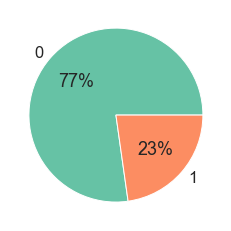

In [167]:
print(y_train.value_counts())
sns.set_palette('Set2')
plt.pie(y_train.value_counts(),
        labels=y_train.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [168]:
smote = SMOTE(random_state= 2021)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [169]:
print('Broj elementa svake klase pre uzorkovanja:\n')
print(y_train_before_sample.value_counts())
print('\nBroj elementa svake klase nakon uzorkovanja:\n')
print(pd.Series(y_train).value_counts())

Broj elementa svake klase pre uzorkovanja:

0    2426
1     715
Name: top_quality, dtype: int64

Broj elementa svake klase nakon uzorkovanja:

0    2426
1    2426
Name: top_quality, dtype: int64


Može se videti da je sada isti broj slučajeva i u skupu podataka za učenje i u skupu podataka za testiranje. Tehnikom stratifikovanog uzorkovanja, smanjen je broj slučajeva većinske klase na onoliko koliko slučajeva ima manjinska klasa.

In [170]:
algorithm = GradientBoostingClassifier()
model = algorithm.fit(X_train, y_train)
stats_result = []
y_hat = model.predict(X_test)  
cross_val = cross_validate(model, X_train, y_train, cv=10, 
                          scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
stats_result.append(stats(cross_val))

**With threshold**

   - Accuracy: 82.857 %

   - Precision: 60.87 %

   - Recall: 57.413 %

   - F1 measure: 59.091 %

**Under- Sampling**

   - Accuracy: 84.1 %

   - Precision: 83.2 %

   - Recall: 85.7 %

   - F1 measure: 84.4 %

In [171]:
pd.DataFrame(stats_result, index= ['Gradient Boosting Tree']).T

,Gradient Boosting Tree
fit_time,"(1.928, 0.051)"
score_time,"(0.019, 0.002)"
test_accuracy,"(0.833, 0.041)"
test_precision,"(0.812, 0.026)"
test_recall,"(0.866, 0.074)"
test_f1,"(0.837, 0.045)"
test_roc_auc,"(0.909, 0.036)"


### Značajnost atributa

In [172]:
X_train = X_train_before_sample
y_train = y_train_before_sample

In [173]:
algorithm = GradientBoostingClassifier()
model = algorithm.fit(X_train, y_train)

In [174]:
model.feature_importances_

array([0.02130965, 0.08524756, 0.0353534 , 0.07635949, 0.0736785 ,
       0.07170623, 0.0402105 , 0.08668911, 0.04580296, 0.46364259])

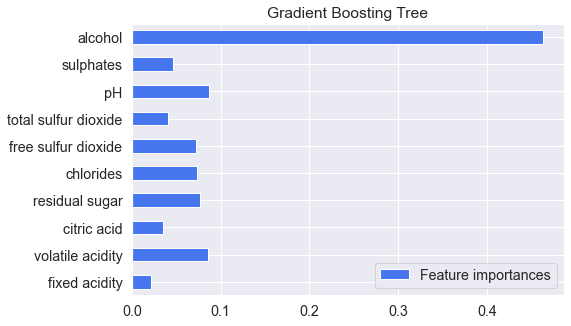

In [175]:
sns.set(font_scale=1.3)
sns.set_palette('turbo')
coefs = pd.DataFrame(
   model.feature_importances_,
   columns=['Feature importances'], index=X_train.columns
)
coefs.plot(kind='barh', figsize=(10, 5))
plt.title('Gradient Boosting Tree')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Na osnovz Gradient Boosting Tree modela, može se zaključiti da su najznačajniji atributi za predviđanje izlaza, tj. kvaliteta belog vina, sledeći:

    - Alkohol
    - PH vrednost
    - Šećer
    - Sirćetna kiselina

Takođe, vrlo jasno može da se vidi i koji atributi nemaju preveliki značaj za predviđanje kvaliteta vina:
    
    - Vinska kiselina
    - Limunska kiselina
    - Ukupan sulfat dioksid

# Regresija

# Drugi deo zadatka

## Učitavanje, pregled i priprema skupa podataka

### Skup podataka o osiguranjima

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
f'Skup podataka o osiguranjima ima {len(df)} redova i {len(df.columns)} atributa.'

'Skup podataka o osiguranjima ima 1338 redova i 7 atributa.'

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Attributes information

   - Age - Broj godina korisnika osiguranja
   - Sex - Pol
   - BMI (Body Mass Index) - Indeks telesne mase
   - Children - Broj dece
   - Smoker - Da li je korisnik pušač ili nije
   - Region - Region prebivališta
   - Charges - Troškovi/Naknade
    


## BMI = m / h2 - Indeks telesne mase
#### m - masa
#### h2 - visina na kvadrat

- <18,5 Neuhranjenost

- 18,5 - 24,9 Idealna masa

- 25 - 29,9 Prekomerna masa

- 30 - 34,9 Blaga gojaznost

- 35 - 39,9 Teška gojaznost

- *>40 Ekstremna gojaznost*

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Svi tipovi podataka atributa su korektni pa nema potrebe za bilo kakvom izmenom.

Takođe, ovaj skup podataka nema nedostajućih vrednosti.

male      676
female    662
Name: sex, dtype: int64


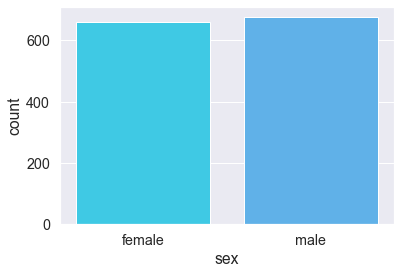

In [8]:
sns.set(font_scale=1.3, palette='cool')
sns.countplot(df['sex'])
print(df['sex'].value_counts())
plt.show()

Muškaraca i žena korisnika osiguranja ima gotovo podjednako, ali ipak prednjači muški pol.

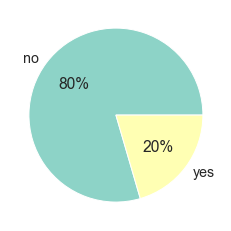

In [9]:
sns.set(font_scale=1.3, palette='Set3')
plt.pie(df['smoker'].value_counts(),labels=df['smoker'].value_counts().index,autopct='%.0f%%')
plt.show()

Više ima nepušača nego što ima pušača i pri tome više je pušača koji su muškarci.

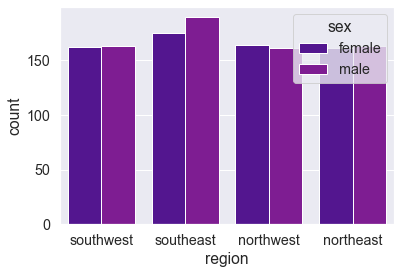

In [10]:
sns.set(font_scale=1.3, palette='plasma')
sns.countplot(df['region'], hue=df['sex'])
plt.show()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


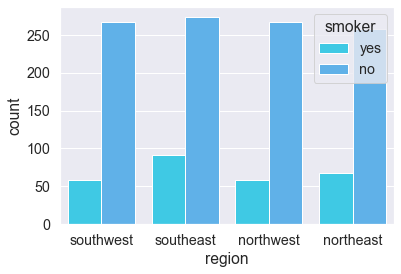

In [11]:
sns.set(font_scale=1.3, palette='cool')
sns.countplot(df['region'], hue=df['smoker'])
print(df['region'].value_counts())
plt.show()

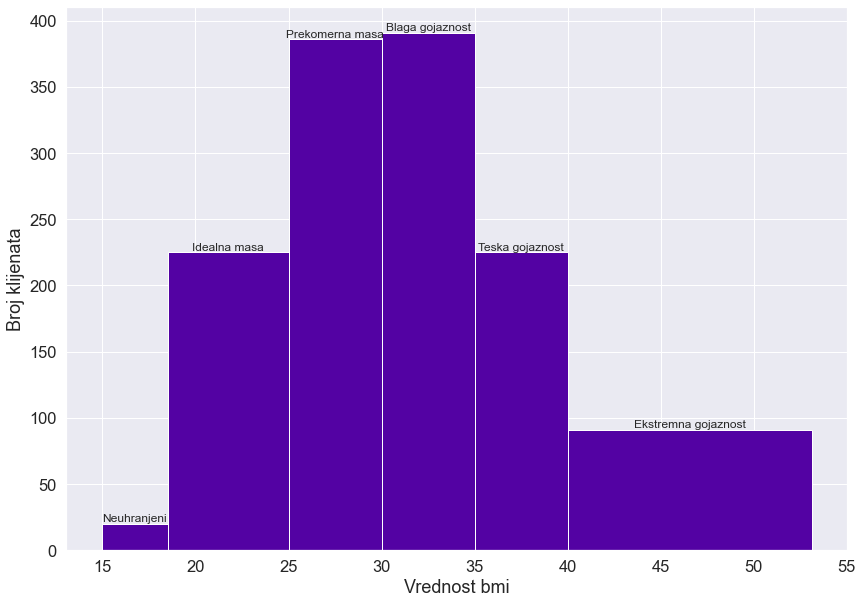

In [12]:
sns.set(font_scale=1.5, palette='plasma')
fig, ax = plt.subplots(1, 1)
df['bmi'].hist(bins=[min(df['bmi'])-1,18.5,25,30,35,40,max(df['bmi'])],figsize=(14,10))

ax.set_xlabel('Vrednost bmi')
ax.set_ylabel('Broj klijenata')

rects = ax.patches
labels = ['Neuhranjeni','Idealna masa','Prekomerna masa','Blaga gojaznost','Teska gojaznost','Ekstremna gojaznost']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.05, label,
    ha='center', va='bottom',size=12)
plt.show()

In [13]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


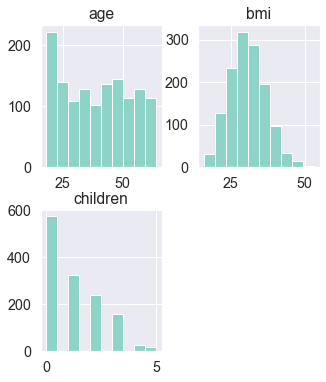

In [14]:
sns.set(font_scale=1.3, palette='Set3')
df.iloc[:,:-1].hist(figsize=(5,6))
plt.show()

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
corr=X.corr()
corr.style.background_gradient(cmap='cool').set_precision(2)

,age,bmi,children
age,1.00,0.11,0.04
bmi,0.11,1.00,0.01
children,0.04,0.01,1.00


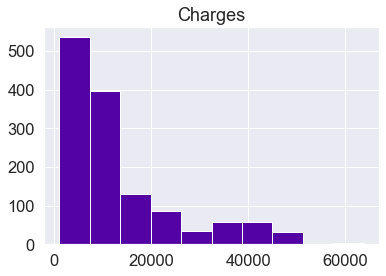

In [17]:
sns.set(font_scale = 1.5, palette='plasma')
y.hist()
plt.title('Charges')
plt.show()

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 2022)

In [19]:
cate_col=list(X_train.select_dtypes(include='object').columns)
num_col=list(X_train.select_dtypes(exclude='object').columns)

In [20]:
num_preparation=SimpleImputer(missing_values=np.nan, strategy='median')
cat_preparation=Pipeline(steps=[('imputer',SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                ('onehot',OneHotEncoder(handle_unknown='ignore'))]) 

In [21]:
preprocessor=ColumnTransformer(transformers=[ ('num',num_preparation,num_col),
                                              ('cat',cat_preparation,cate_col)])

In [22]:
algorithm = DecisionTreeRegressor()

In [23]:
pip = Pipeline(steps=[('preprocessor',preprocessor),
                      ('dt',algorithm)])
model = pip.fit(X_train,y_train)
y_hat = model.predict(X_test)

In [24]:
def rmse_score(y_true, y_predict):
    diff = y_true-y_predict
    diff_squared = np.power(diff,2)
    mse = diff_squared.mean()
    rmse = np.sqrt(mse)
    return(rmse)

rmse = make_scorer(rmse_score, greater_is_better=False)

In [25]:
def error_stats(cv_dict):
    stats = {}
    for k,v in cv_dict.items(): 
        stats.update({k:(v.mean(), v.std())})
    return(stats)

In [26]:
cv_dict = cross_validate(pip, X_train, y_train, cv = 5, scoring={'MAE':'neg_mean_absolute_error', 'RMSE':rmse, 'R2':'r2'})
results = pd.DataFrame(error_stats(cv_dict), index= ['mean', 'std'])
results

,fit_time,score_time,test_MAE,test_RMSE,test_R2
mean,0.013857,0.0016,-3287.381814,-6730.541104,0.678277
std,0.004265,0.0032,307.743300,337.854409,0.024375


In [27]:
pom={}
for depth in range(1,14,2):
    for split in range(10,80,9):
        pip=Pipeline(steps=[('preprocessor',preprocessor),
             ('dt',DecisionTreeRegressor(max_depth=depth,min_samples_split=split))])
        pom_str=f"depth:{depth}, split:{split}"
        pom[pom_str]=cross_validate(pip,X_train,y_train,cv=10,scoring={'RMSE':rmse})['test_RMSE'].mean()

In [28]:
dict(sorted(pom.items(), key=lambda i:i[1],reverse=True))

{'depth:5, split:46': -4687.694585457853,
 'depth:5, split:55': -4713.444080798847,
 'depth:5, split:64': -4727.303628565099,
 'depth:7, split:73': -4731.528738808544,
 'depth:9, split:73': -4737.029927825804,
 'depth:11, split:73': -4737.029927825805,
 'depth:13, split:73': -4737.029927825805,
 'depth:5, split:37': -4740.388706368677,
 'depth:7, split:64': -4741.416575034527,
 'depth:5, split:73': -4749.329002303317,
 'depth:7, split:55': -4750.1955801658705,
 'depth:11, split:64': -4751.693788722581,
 'depth:13, split:64': -4751.693788722581,
 'depth:9, split:64': -4753.642800252787,
 'depth:11, split:55': -4768.794734772987,
 'depth:13, split:55': -4768.794734772987,
 'depth:9, split:55': -4771.3642255907125,
 'depth:3, split:10': -4780.769924545437,
 'depth:3, split:46': -4780.769924545437,
 'depth:3, split:64': -4780.769924545437,
 'depth:3, split:28': -4780.769924545438,
 'depth:3, split:55': -4780.769924545438,
 'depth:3, split:19': -4780.769924545439,
 'depth:3, split:37': -478

In [29]:
pip_final = Pipeline(steps=[('preprocessor',preprocessor),
                            ('dt',DecisionTreeRegressor(max_depth=5,min_samples_split=46))])
y_hat=pip_final.fit(X_train,y_train).predict(X_test)

In [30]:
rmse_score(y_test, y_hat)

4410.253162290047

(0.0, 61442.555949)

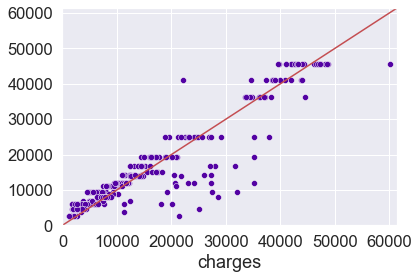

In [31]:
f,ax=plt.subplots()
sns.set(font_scale = 1.3, palette='plasma')
sns.scatterplot(y_test,y_hat)
ax.plot([0, 1], [0, 1], transform=ax.transAxes,color='r')
plt.xlim(0,61442.555949)
plt.ylim(0,61442.555949)

Mozemo videti da podatke precenjujemo (predikcija je veca nego stvarna vrednost).

# Using log

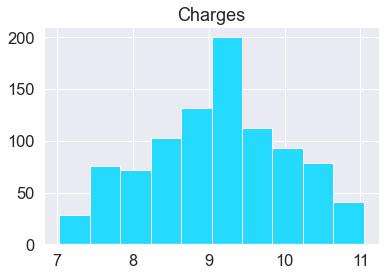

In [32]:
y_train_log = np.log(y_train)
sns.set(font_scale = 1.5, palette='cool')
y_train_log.hist()
plt.title('Charges')
plt.show()

In [33]:
pom2={}
for depth in range(1,14,2):
    for split in range(10,80,9):
        pip=Pipeline(steps=[('preprocessor',preprocessor),
                            ('dt',DecisionTreeRegressor(max_depth=depth, min_samples_split=split))])
        pom_str=f"depth:{depth}, split:{split}"
        pom2[pom_str]=cross_validate(pip, X_train, y_train_log, cv=10,scoring={'RMSE':rmse})['test_RMSE'].mean()

In [34]:
dict(sorted(pom2.items(),key=lambda i:i[1],reverse=True))

{'depth:5, split:73': -0.3976386869621707,
 'depth:5, split:64': -0.39778251507793533,
 'depth:7, split:73': -0.39941214350899695,
 'depth:13, split:73': -0.39941214350899695,
 'depth:11, split:73': -0.399412143508997,
 'depth:9, split:73': -0.3994121435089971,
 'depth:5, split:19': -0.4000379804359824,
 'depth:5, split:10': -0.4004828989981962,
 'depth:7, split:64': -0.40091557141912615,
 'depth:9, split:64': -0.40104630162475613,
 'depth:11, split:64': -0.40104630162475613,
 'depth:13, split:64': -0.40104630162475613,
 'depth:5, split:37': -0.4025547847163862,
 'depth:5, split:55': -0.4030800063003139,
 'depth:5, split:28': -0.40338007634627465,
 'depth:5, split:46': -0.4035314960864958,
 'depth:7, split:55': -0.410626352285352,
 'depth:9, split:55': -0.41090054014914357,
 'depth:11, split:55': -0.41090054014914357,
 'depth:13, split:55': -0.41090054014914357,
 'depth:7, split:46': -0.41597445566522706,
 'depth:9, split:46': -0.4173425119326958,
 'depth:11, split:46': -0.417342511932

In [35]:
pip_log =Pipeline(steps=[('preprocessor',preprocessor),
                         ('dt',DecisionTreeRegressor(max_depth=5,min_samples_split=73))])
model = pip_log.fit(X_train, y_train_log)
y_hat = np.exp(model.predict(X_test))

In [36]:
rmse_score(y_test, y_hat)

4410.559008617086

(0.0, 61442.555949)

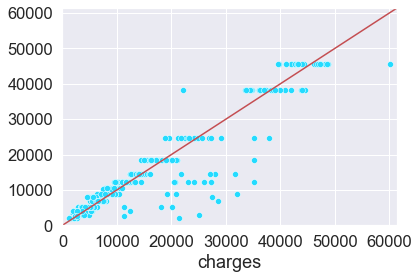

In [37]:
f,ax=plt.subplots()
sns.set(font_scale = 1.3, palette='ocean')
sns.scatterplot(y_test,y_hat)
ax.plot([0, 1], [0, 1], transform=ax.transAxes,color='r')
plt.xlim(0,61442.555949)
plt.ylim(0,61442.555949)

Mozemo videti da dobijamo bolje rezulate, kada smo izlaznu promenljivu prethodno logaritmovali

### Biblioteke koje su korišćene za potrebe ovog projekta:

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import scikitplot as skplt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from scipy import stats

#### Normalizacija podataka na osnovu MinMaxScalera-a

In [244]:
X_train_denorm = X_train
y_train_denorm = y_train

In [159]:
X_train = MinMaxScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns= X_test.columns)
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.612245,0.336634,0.400000,0.325871,0.148936,0.139535,0.248945,0.168675,0.210526,0.553571
1,0.448980,0.534653,0.371429,0.099502,0.329787,0.197674,0.464135,0.530120,0.403509,0.821429
2,0.061224,0.504950,0.200000,0.029851,0.234043,0.779070,0.628692,0.807229,0.368421,0.375000
3,0.346939,0.594059,0.671429,0.034826,0.393617,0.662791,0.805907,0.530120,0.438596,0.214286
4,0.551020,0.356436,0.271429,0.373134,0.393617,0.593023,0.708861,0.433735,0.473684,0.232143


In [160]:
X_test = MinMaxScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns= X_train.columns)
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.461538,0.312925,0.406504,0.409677,0.167260,0.691489,0.652632,0.22,0.297619,0.198347
1,0.384615,0.761905,0.243902,0.019355,0.074733,0.159574,0.235088,0.37,0.452381,0.809917
2,0.492308,0.312925,0.227642,0.032258,0.145907,0.319149,0.449123,0.52,0.404762,0.413223
3,0.338462,0.204082,0.268293,0.017742,0.124555,0.132979,0.731579,0.54,0.261905,0.495868
4,0.446154,0.190476,0.260163,0.525806,0.167260,0.489362,0.522807,0.58,0.190476,0.264463


Podaci su normalizovani i svedeni na opseg između 0 i 1 samo na skupu podataka za učenje, jer skup podataka za testiranje treba da ostane realan.

### Logistička regresija

In [300]:
algorithm = LogisticRegression()
model = algorithm.fit(X_train, y_train)
y_hat = model.predict(X_test)

Prvi model je napravljen na osnovu algoritma Logističke regresije. 

<AxesSubplot:>

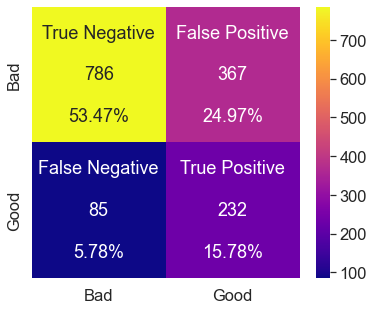

In [301]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

Ispod je definisana funkcija na osnovu koje se računaju evolucione metrike.

In [35]:
def compute_eval_metrics(y_test, y_hat):
    '''
    This function compute evaluation metrics where positive label is 'Good'.
    '''
    print('Accuracy: {} %\n'.format(round(accuracy_score(y_test, y_hat)*100,3)))
    print('Precision: {} %\n'.format(round(precision_score(y_test, y_hat)*100,3)))
    print('Recall: {} %\n'.format(round(recall_score(y_test, y_hat)*100,3)))
    print('F1 measure: {} %\n\n'.format(round(f1_score(y_test, y_hat)*100,3)))

In [302]:
compute_eval_metrics(y_test, y_hat)

Accuracy: 69.252 %

Precision: 38.731 %

Recall: 73.186 %

F1 measure: 50.655 %


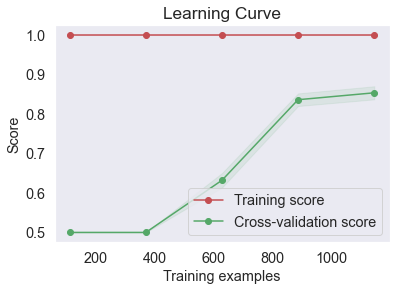

In [309]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)
plt.show()

### Random Forest Tree

In [310]:
algorithm = RandomForestClassifier()
model = algorithm.fit(X_train, y_train)
y_hat = model.predict(X_test)

Sledeći model će biti napravljen na osnovu algoritma *RandomForest Tree*.

<AxesSubplot:>

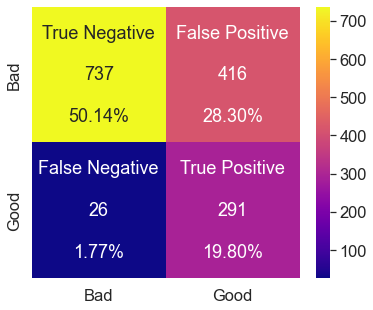

In [311]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

In [312]:
compute_eval_metrics(y_test, y_hat)

Accuracy: 69.932 %

Precision: 41.16 %

Recall: 91.798 %

F1 measure: 56.836 %


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

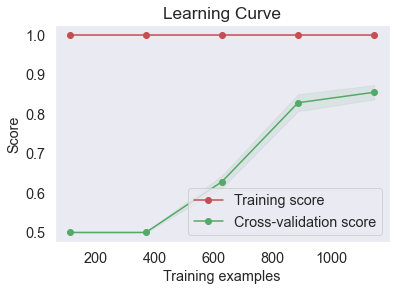

In [306]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)

### Gradient Boosted Tree

In [313]:
algorithm = GradientBoostingClassifier()
model = algorithm.fit(X_train, y_train)
y_hat = model.predict(X_test)

Sledeći model će biti napravljen na osnovu algoritma *Gradient Boosted Tree*.

<AxesSubplot:>

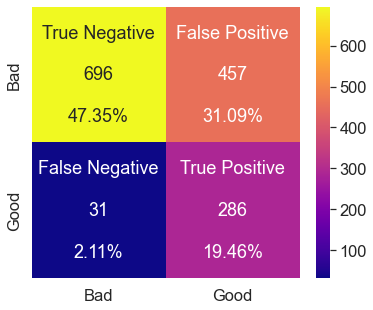

In [315]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

In [316]:
compute_eval_metrics(y_test, y_hat)

Accuracy: 66.803 %

Precision: 38.493 %

Recall: 90.221 %

F1 measure: 53.962 %


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

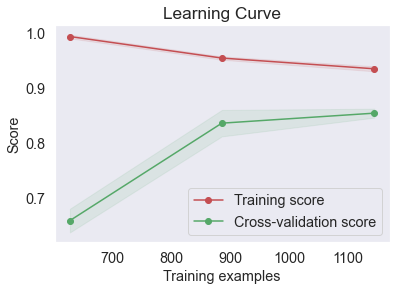

In [317]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)

### Naive Bayes

In [318]:
algorithm = GaussianNB()
model = algorithm.fit(X_train, y_train)
y_hat = model.predict(X_test)

Sledeći model će biti napravljen na osnovu algoritma *Naive Bayes*.

<AxesSubplot:>

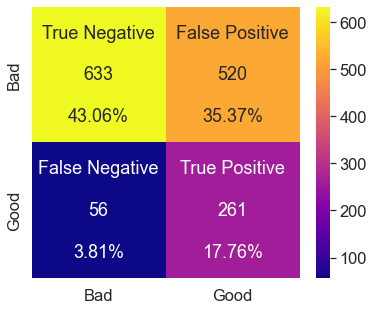

In [320]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

In [321]:
compute_eval_metrics(y_test, y_hat)

Accuracy: 60.816 %

Precision: 33.419 %

Recall: 82.334 %

F1 measure: 47.541 %


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

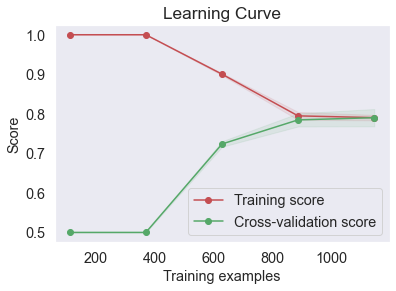

In [322]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)

## SMOTE over-sampling and results

In [323]:
y_train=y_train_before_sample
X_train=X_train_before_sample

0    2426
1     715
Name: top_quality, dtype: int64


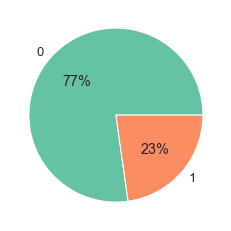

In [324]:
print(y_train.value_counts())
sns.set_palette('Set2')
plt.pie(y_train.value_counts(),
        labels=y_train.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [325]:
smote = SMOTE(random_state= 2021)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [326]:
print('Broj elementa svake klase pre uzorkovanja:\n')
print(y_train_before_sample.value_counts())
print('\nBroj elementa svake klase nakon uzorkovanja:\n')
print(pd.Series(y_train).value_counts())

Broj elementa svake klase pre uzorkovanja:

0    2426
1     715
Name: top_quality, dtype: int64

Broj elementa svake klase nakon uzorkovanja:

0    2426
1    2426
Name: top_quality, dtype: int64


Može se videti da je sada isti broj slučajeva i u skupu podataka za učenje i u skupu podataka za testiranje. Tehnikom stratifikovanog uzorkovanja, povećan je broj slučajeva manjinske klase na onoliko koliko slučajeva ima većinske klase.

### Logistička regresija SMOTE

In [328]:
algorithm = LogisticRegression()
model = algorithm.fit(X_train, y_train)
y_hat = model.predict(X_test)

Prvi model je napravljen na osnovu algoritma Logističke regresije. 

<AxesSubplot:>

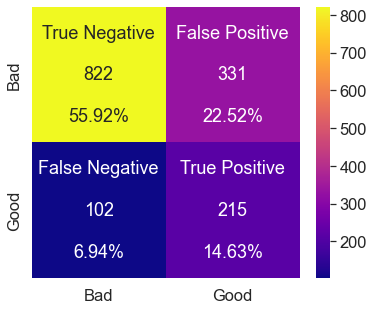

In [329]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

In [330]:
compute_eval_metrics(y_test, y_hat)

Accuracy: 70.544 %

Precision: 39.377 %

Recall: 67.823 %

F1 measure: 49.826 %


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

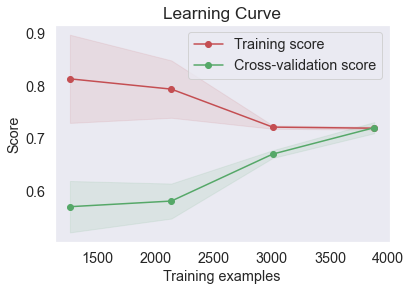

In [331]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)

### Random Forest Tree SMOTE

In [332]:
algorithm = RandomForestClassifier()
model = algorithm.fit(X_train, y_train)
y_hat = model.predict(X_test)

Sledeći model će biti napravljen na osnovu algoritma *RandomForest Tree*.

<AxesSubplot:>

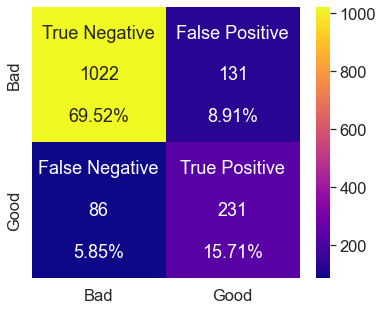

In [333]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

In [334]:
compute_eval_metrics(y_test, y_hat)

Accuracy: 85.238 %

Precision: 63.812 %

Recall: 72.871 %

F1 measure: 68.041 %


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

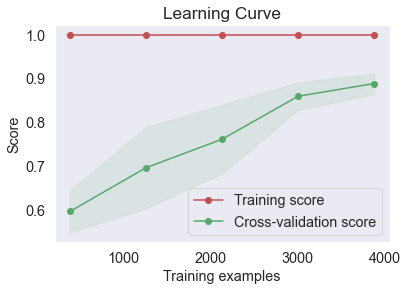

In [335]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)

### Gradient Boosted Tree SMOTE

In [343]:
algorithm = GradientBoostingClassifier()
model = algorithm.fit(X_train, y_train)
y_hat = model.predict(X_test)

Sledeći model će biti napravljen na osnovu algoritma *Gradient Boosted Tree*.

<AxesSubplot:>

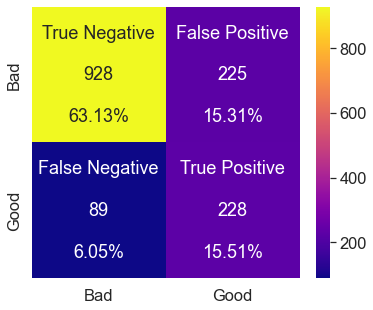

In [344]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

In [345]:
compute_eval_metrics(y_test, y_hat)

Accuracy: 78.639 %

Precision: 50.331 %

Recall: 71.924 %

F1 measure: 59.221 %


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

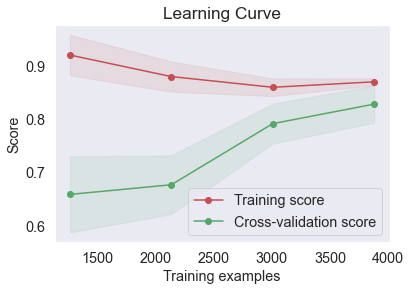

In [348]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)

### Naive Bayes SMOTE

In [349]:
algorithm = GaussianNB()
model = algorithm.fit(X_train, y_train)
y_hat = model.predict(X_test)

Sledeći model će biti napravljen na osnovu algoritma *Naive Bayes*.

<AxesSubplot:>

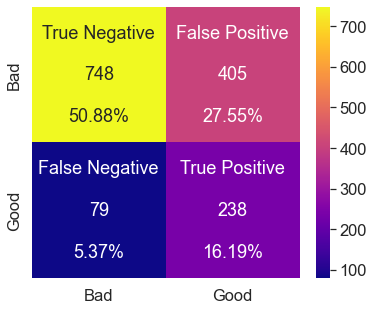

In [350]:
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.5)
cf_matrix = confusion_matrix(y_test, y_hat)
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma', xticklabels= ['Bad', 'Good'], yticklabels= ['Bad', 'Good'])

In [352]:
compute_eval_metrics(y_test, y_hat)

Accuracy: 67.075 %

Precision: 37.014 %

Recall: 75.079 %

F1 measure: 49.583 %


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

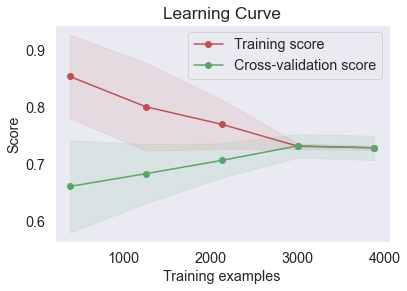

In [353]:
sns.set(font_scale=1.2)
skplt.estimators.plot_learning_curve(algorithm, X_train, y_train)

### Poređenje više modela Cluster

Funkcija koja prati aritmetičku sredinu i standardnu devijaciju na svakom od *fold*-ova.

In [47]:
def stats(cv_dict):
    stats = {}
    for k,v in cv_dict.items(): 
        stats.update({k:(round(v.mean(),3), round(v.std(),3))})
    return(stats)

In [506]:
models = {'Naive Bayes':GaussianNB(), 
          'Random Forest': RandomForestClassifier(), 
          'GradientBoosted Tree' : GradientBoostingClassifier(),
          'Logistic Regression': LogisticRegression()}

cc = ClusterCentroids(random_state= 2021)
X_train, y_train = cc.fit_resample(X_train_before_sample, y_train_before_sample)
stats_result = []

for name, model in models.items():
    
       
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)   
    
    cross_val = cross_validate(model, X_train.values, y_train.values, cv=10, 
                              scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], return_train_score = True)
    stats_result.append(stats(cross_val))

    
   

In [507]:
pd.DataFrame(stats_result, index= models.keys()).T

,Naive Bayes,Random Forest,GradientBoosted Tree,Logistic Regression
fit_time,"(0.001, 0.001)","(0.337, 0.057)","(0.336, 0.065)","(0.068, 0.01)"
score_time,"(0.008, 0.002)","(0.028, 0.006)","(0.003, 0.003)","(0.003, 0.001)"
test_accuracy,"(0.792, 0.031)","(0.853, 0.031)","(0.843, 0.024)","(0.734, 0.029)"
train_accuracy,"(0.794, 0.004)","(1.0, 0.0)","(0.929, 0.004)","(0.731, 0.006)"
test_precision,"(0.78, 0.032)","(0.838, 0.031)","(0.832, 0.034)","(0.733, 0.025)"
train_precision,"(0.78, 0.005)","(1.0, 0.0)","(0.922, 0.004)","(0.729, 0.006)"
test_recall,"(0.815, 0.048)","(0.876, 0.044)","(0.86, 0.032)","(0.737, 0.067)"
train_recall,"(0.818, 0.008)","(1.0, 0.0)","(0.937, 0.006)","(0.737, 0.013)"
test_f1,"(0.797, 0.032)","(0.856, 0.032)","(0.845, 0.023)","(0.733, 0.036)"
train_f1,"(0.799, 0.004)","(1.0, 0.0)","(0.93, 0.004)","(0.733, 0.007)"


### Poređenje više modela SMOTE

In [508]:
models = {'Naive Bayes':GaussianNB(), 
          'Random Forest': RandomForestClassifier(), 
          'GradientBoosted Tree' : GradientBoostingClassifier(),
          'Logistic Regression': LogisticRegression()}

smote = SMOTE(random_state= 2021)
X_train, y_train = smote.fit_resample(X_train_before_sample, y_train_before_sample)
stats_result = []

for name, model in models.items():
    
       
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)   
    
    cross_val = cross_validate(model, X_train.values, y_train.values, cv=10, 
                              scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], return_train_score = True)
    stats_result.append(stats(cross_val))

    
   

In [509]:
pd.DataFrame(stats_result, index= models.keys()).T

,Naive Bayes,Random Forest,GradientBoosted Tree,Logistic Regression
fit_time,"(0.002, 0.003)","(0.951, 0.142)","(0.876, 0.082)","(0.094, 0.021)"
score_time,"(0.006, 0.006)","(0.05, 0.011)","(0.007, 0.004)","(0.003, 0.002)"
test_accuracy,"(0.727, 0.027)","(0.896, 0.026)","(0.833, 0.041)","(0.711, 0.019)"
train_accuracy,"(0.729, 0.003)","(1.0, 0.0)","(0.868, 0.005)","(0.716, 0.002)"
test_precision,"(0.7, 0.023)","(0.883, 0.013)","(0.812, 0.026)","(0.704, 0.021)"
train_precision,"(0.701, 0.003)","(1.0, 0.0)","(0.845, 0.006)","(0.71, 0.002)"
test_recall,"(0.795, 0.039)","(0.913, 0.054)","(0.866, 0.074)","(0.73, 0.032)"
train_recall,"(0.798, 0.002)","(1.0, 0.0)","(0.901, 0.005)","(0.733, 0.002)"
test_f1,"(0.744, 0.027)","(0.897, 0.029)","(0.837, 0.045)","(0.716, 0.02)"
train_f1,"(0.746, 0.002)","(1.0, 0.0)","(0.872, 0.005)","(0.721, 0.002)"
